# Download Images from Azure

This notebook is used for download the raw images from azure.

The data comes from the 2019 Bolivian elections.
The general idea is to create a dataset for OCR models and automate the reading process using computer vision and deep learning techniques.

The Azure bucket is provided by a friend that downloaded this images the 2019.

In [1]:
## Install azure storage blob

%pip install azure-storage-blob


     |████████████████████████████████| 326 kB 441 kB/s eta 0:00:01
     |████████████████████████████████| 121 kB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.7 MB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 84 kB 605 kB/s eta 0:00:011
     |████████████████████████████████| 45 kB 66 kB/s  eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


## Some imports

In [1]:
import os, uuid
from pprint import pprint
from tqdm import tqdm

from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient

try:
    print("Azure Blob storage v12 - Python quickstart sample")
    # Quick start code goes here
except Exception as ex:
    print('Exception:')
    print(ex)

Azure Blob storage v12 - Python quickstart sample


## Read Enviromental variables

These credentials were provided by a friend.

In [2]:
AZURE_STORAGE_CONNECTION_STRING = os.getenv("AZURE_STORAGE_CONNECTION_STRING")
AZURE_CONNECTION_STRING = os.getenv("AZURE_CONNECTION_STRING")

## Create the BlobServiceClient object


We instantiate the client for the Blob service.

In [3]:
# Create the BlobServiceClient object which will be used to create a container client
blob_service_client = BlobServiceClient.from_connection_string(AZURE_CONNECTION_STRING)


## Read containers info

We list the names of the current buckets.

In [5]:
for container in blob_service_client.list_containers():
    pprint(container)

{'name': 'imgactastrep', 'last_modified': datetime.datetime(2019, 10, 26, 3, 42, 37, tzinfo=datetime.timezone.utc), 'etag': '"0x8D759C68BA9DA5B"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'blob', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x7fc4ac21f110>}
{'name': 'quickstartf58cb111-ce2d-45dd-b726-8eb767e83be3', 'last_modified': datetime.datetime(2020, 8, 24, 14, 45, 9, tzinfo=datetime.timezone.utc), 'etag': '"0x8D8483C4CF15146"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': None, 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x7fc4a4c6ed10>}
{'name': 'uploadedimages', 'last_modified': datetime.date

## List images 

In [10]:
def get_image_name_list(bucket_name:str):
    
    """ Get a list of image names from Azure Bucket
    
    Parameters
    ----------
    bucket_name :  string, bucket name
    
    Returns
    -------
    image_names : list[str]
        list of image names
    """
    
    # Create the container
    
    container_client = blob_service_client.get_container_client(bucket_name)
    print("\nListing blobs...")

    # List the blobs in the container
    blob_list = container_client.list_blobs()

    image_names = []

    for blob in tqdm(blob_list):
        image_names.append(blob.name)

    return image_names

List the image inside each bucket from the above result, the current buckets are:
    * imgactastrep
    * uploadedimages
    * uploadedimagescomputo

In [2]:
# create aux variable

#target_bucket = "uploadedimages"
#target_bucket = "uploadedimagescomputo"
target_bucket = "imgactastrep"

List the image names as a python list


In [35]:
# list the image names as a python list

image_names_computo = get_image_name_list(bucket_name = target_bucket)

print(len(image_names_computo))

0it [00:00, ?it/s]


Listing blobs...


1695it [00:07, 218.74it/s]

1695


In [15]:
def download_images(image_name_list, container_name):
    
    """
        Download images from  Azure bucket
    """
    
    status = {
        "DONE": [],
        "FAIL": []
    }
    # Create folder for download the info
    os.makedirs(container_name,exist_ok=True)
        
    # Iterate over the names of the images listed above and download one by one.
    for blob_name in tqdm(image_name_list, desc=f"Dowloading...{container_name}"):
        try:
            blob = BlobClient.from_connection_string(AZURE_CONNECTION_STRING, container_name= container_name, blob_name = blob_name)
            
            with open(f"./{container_name}/{blob_name}", "wb") as my_blob:
                    
                # Download info
                blob_data = blob.download_blob()
                
                # Read info
                blob_data.readinto(my_blob)
                
                # Append status
                status["DONE"].append(blob_name)
                
        except Exception  as e:
            
            status["FAIL"].append(blob_name)
            print(e)
                    
     
    print("DONE!")
    
    return status


In [37]:
# Starrt the download for 'target_bucket'
status = download_images(image_names_computo, target_bucket)
status

Dowloading...imgactastrep: 100%|██████████| 1695/1695 [1:41:58<00:00,  3.61s/it]  

DONE!


{'DONE': ['0001581e-94b1-4f1e-a4c1-ae86909576aa.jpg',
  '0001bce9-446d-4afd-8fe8-b962caaa95d9.jpg',
  '000452e4-70be-496a-a60f-ac2327293fe2.jpg',
  '00050299-3f19-4e6a-bf69-c73645d053b0.jpg',
  '0009394e-2cd6-4ffe-8f4b-3fcc3ebd3e6c.jpg',
  '000ba5e0-7a3d-4115-9be0-bc28215ee825.jpg',
  '000bc92d-7a1b-433d-99bf-1433d21c5b96.jpg',
  '000da5d8-b3eb-4d6c-841e-4b7e8c1a8f33.jpg',
  '000db1a1-12d8-4af2-ab96-85a2aa804973.jpg',
  '00106aea-3980-4535-927c-21182b28dd9b.jpg',
  '0011af8d-0bc4-4774-b314-4d062661279f.jpg',
  '001b6dd8-4131-4527-9255-526395a57bf0.jpg',
  '00204587-9919-4408-9af3-5643f8945906.jpg',
  '00229a8d-de1c-4bde-a8f3-6f6254c9bffe.jpg',
  '0024c74a-f54a-4e63-91c7-79687a7bda7a.jpg',
  '0026c9f6-f077-48c8-845d-c5e8c539848c.jpg',
  '00285d59-4d1c-48f7-ae88-1f46123e84f2.jpg',
  '00294319-f14c-4728-89d9-01cc06a711a6.jpg',
  '00299b62-93f0-4b90-87b2-41faba283aaf.jpg',
  '0029c37e-99f8-4bdb-ad55-4a207941c180.jpg',
  '002bd21c-5017-4a5b-bec5-fb0952696729.jpg',
  '0031f34e-8473-4ca6-b037

## Check the downloaded data

In [30]:
import matplotlib.pyplot as plt
from glob import glob
from skimage.transform import resize
import numpy as np
%matplotlib inline

In [32]:

def imcrop_tosquare(img):
    """Make any image a square image.
    Parameters
    ----------
    img : np.ndarray
        Input image to crop, assumed at least 2d.
    Returns
    -------
    crop : np.ndarray
        Cropped image.
    """
    size = np.min(img.shape[:2])
    extra = img.shape[:2] - size
    crop = img
    for i in np.flatnonzero(extra):
        crop = np.take(crop, extra[i] // 2 + np.r_[:size], axis=i)
    return crop


def read_files_as_numpy(filenames_list:list, samples:int):
    """Read the images from disk and outputs this as numpy array

    Parameters
    ----------
    filenames_list : python list with image names.
    
    samples : int
         How many samples to take?

    Returns
    -------
    m : numpy.ndarray
        Montage image.
    """
    # Read every filename as an RGB image
    imgs = [plt.imread(fname)[..., :3] for fname in filenames_list[:samples]]

    # Crop every image to a square
    imgs_or = [imcrop_tosquare(img_i) for img_i in imgs]

    # Then resize the square image to 100 x 100 pixels
    imgs = [resize(img_i, (100, 100)) for img_i in imgs_or]

    # Finally make our list of 3-D images a 4-D array with the first dimension the number of images:
    imgs_4d = np.array(imgs).astype(np.float32)
   
    return imgs_4d

In [20]:
def montage(images, saveto='montage.png'):
    """Draw all images as a montage separated by 1 pixel borders.

    Also saves the file to the destination specified by `saveto`.

    Parameters
    ----------
    images : numpy.ndarray
        Input array to create montage of.  Array should be:
        batch x height x width x channels.
    saveto : str
        Location to save the resulting montage image.

    Returns
    -------
    m : numpy.ndarray
        Montage image.
    """
    if isinstance(images, list):
        images = np.array(images)
    img_h = images.shape[1]
    img_w = images.shape[2]
    n_plots = int(np.ceil(np.sqrt(images.shape[0])))
    if len(images.shape) == 4 and images.shape[3] == 3:
        m = np.ones(
            (images.shape[1] * n_plots + n_plots + 1,
             images.shape[2] * n_plots + n_plots + 1, 3)) * 0.5
    else:
        m = np.ones(
            (images.shape[1] * n_plots + n_plots + 1,
             images.shape[2] * n_plots + n_plots + 1)) * 0.5
    for i in range(n_plots):
        for j in range(n_plots):
            this_filter = i * n_plots + j
            if this_filter < images.shape[0]:
                this_img = images[this_filter]
                m[1 + i + i * img_h:1 + i + (i + 1) * img_h,
                  1 + j + j * img_w:1 + j + (j + 1) * img_w] = this_img
    plt.imsave(arr=m, fname=saveto)
    return m

## List the folders

In [8]:
%ls full_dataset/

imgactastrep/  uploadedimages/  uploadedimagescomputo/


### uploadedimages


In [5]:
!du -sh  full_dataset/uploadedimages

22G	full_dataset/uploadedimages


In [15]:
uploadedimages = glob("./full_dataset/uploadedimages/*.jpg")

print("TOTAL IMAGES:", len(uploadedimages))

TOTAL IMAGES: 32453


In [39]:
images_4d = read_files_as_numpy(filenames_list = uploadedimages, samples = 16)

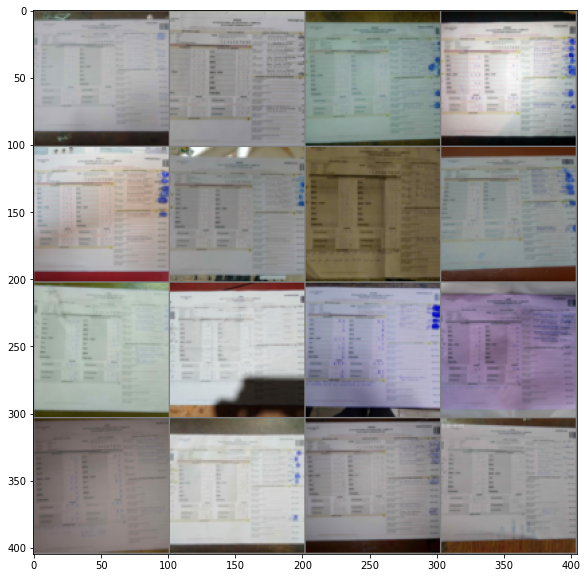

In [41]:
# Plot the resulting dataset:

# Make sure we have a 16 x 100 x 100 x 3 dimension array

assert(images_4d.shape == (16, 100, 100, 3))

plt.figure(figsize=(10, 10))
plt.imshow(montage(images_4d, saveto='dataset_uploadedimages.png'))

### uploadedimagescomputo

In [6]:
# uploadedimagescomputo

!du -sh  full_dataset/uploadedimagescomputo

22G	full_dataset/uploadedimagescomputo


In [36]:
uploadedimagescomputo = glob("./full_dataset/uploadedimagescomputo/*.jpg")

print("TOTAL IMAGES:", len(uploadedimagescomputo))

TOTAL IMAGES: 34555


In [37]:
images_4d = read_files_as_numpy(filenames_list = uploadedimagescomputo, samples = 16)

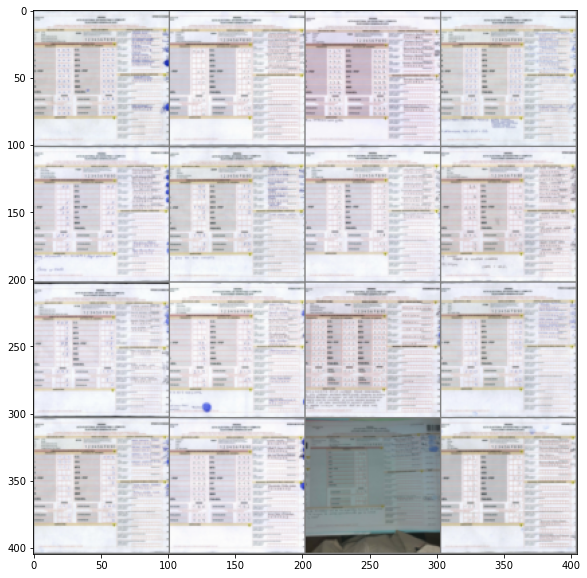

In [38]:
# Plot the resulting dataset:

# Make sure we have a 16 x 100 x 100 x 3 dimension array

assert(images_4d.shape == (16, 100, 100, 3))

plt.figure(figsize=(10, 10))

plt.imshow(montage(images_4d, saveto='dataset_uploadedimagescomputo.png'))

### imgactastrep

In [7]:
# imgactastrep

!du -sh  full_dataset/imgactastrep

1,2G	full_dataset/imgactastrep


In [42]:
imgactastrep = glob("./full_dataset/imgactastrep/*.jpg")

print("TOTAL IMAGES:", len(imgactastrep))

TOTAL IMAGES: 1695


In [43]:
images_4d = read_files_as_numpy(filenames_list = imgactastrep, samples = 16)

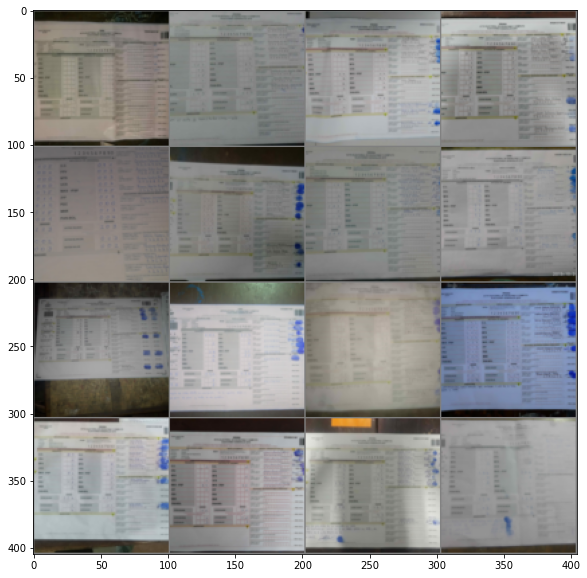

In [44]:
# Plot the resulting dataset:

# Make sure we have a 16 x 100 x 100 x 3 dimension array

assert(images_4d.shape == (16, 100, 100, 3))

plt.figure(figsize=(10, 10))
plt.imshow(montage(images_4d, saveto='dataset_imgactastrep.png'))